In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
X = boston.data
y = boston.target
names = boston.feature_names

In [3]:
len(X), type(X)

(506, numpy.ndarray)

In [12]:
dfX0 = pd.DataFrame(X, columns=names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail(2)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,1,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,1,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
# sns.pairplot(df) #오래 걸려!

- png, jpeg와 SVG의 차이. 만약 scatter plot 같은 경우 scatter가 매우 많을 때에는 png보다 용량이 더 클 수 있다.

In [10]:
# sns.pairplot(df_all, diag_kind="kde", kind="reg")
# plt.show()

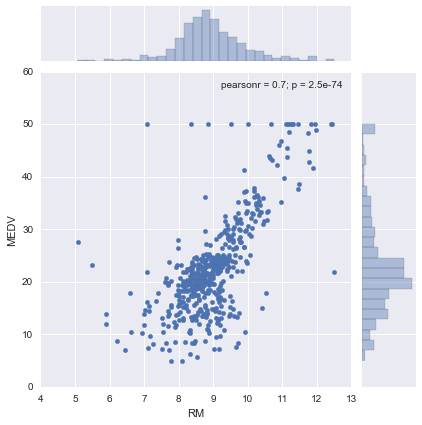

In [6]:
sns.jointplot("RM", "MEDV", data=df)
plt.show()

In [7]:
import statsmodels.api as sm

In [13]:
model = sm.OLS(df.ix[:, -1], df.ix[:, :-1])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Sep 2016   Prob (F-statistic):          6.95e-135
Time:                        11:26:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

### scale

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[  7.35886276e-04,   7.72552226e-01,   3.37050589e-01, ...,
          7.07414614e+00,   4.35175383e+00,   6.98065441e-01],
       [  3.17991364e-03,   0.00000000e+00,   1.03157907e+00, ...,
          8.23005237e+00,   4.35175383e+00,   1.28118838e+00],
       [  3.17758489e-03,   0.00000000e+00,   1.03157907e+00, ...,
          8.23005237e+00,   4.30712889e+00,   5.64900347e-01],
       ..., 
       [  7.07475477e-03,   0.00000000e+00,   1.74069850e+00, ...,
          9.70961235e+00,   4.35175383e+00,   7.90580138e-01],
       [  1.27604078e-02,   0.00000000e+00,   1.74069850e+00, ...,
          9.70961235e+00,   4.31392680e+00,   9.08326116e-01],
       [  5.52031145e-03,   0.00000000e+00,   1.74069850e+00, ...,
          9.70961235e+00,   4.35175383e+00,   1.10456941e+00]])

In [15]:
dfX0 = pd.DataFrame(X_scaled, columns=names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail(2)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,1,0.01276,0.0,1.740698,0.0,4.949763,9.679131,3.175559,1.135609,0.11496,1.621424,9.709612,4.313927,0.908326,22.0
505,1,0.00552,0.0,1.740698,0.0,4.949763,8.590692,2.873294,1.190800,0.11496,1.621424,9.709612,4.351754,1.104569,11.9


In [8]:
model = sm.OLS(df.ix[:, -1], df.ix[:, :-1])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Sep 2016   Prob (F-statistic):          6.95e-135
Time:                        11:20:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

- cond number가 이상할 때(10000이 넘어갈 때). scale의 문제와 dependant 문제. 그래서 scale 과정을 거쳐서 1000 이하로 떨어뜨렸다.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df.ix[:, :-1], df.ix[:, -1])
model.intercept_, model.coef_

(36.491103280361394,
 array([ 0.        , -0.92041113,  1.08098058,  0.14296712,  0.68220346,
        -2.06009246,  2.67064141,  0.02112063, -3.10444805,  2.65878654,
        -2.07589814, -2.06215593,  0.85664044, -3.74867982]))

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


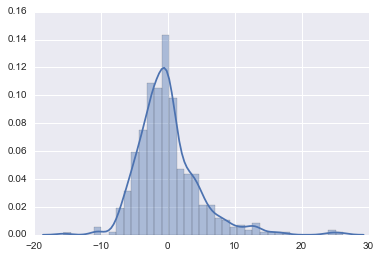

In [17]:
sns.distplot(result.resid)
plt.show();

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


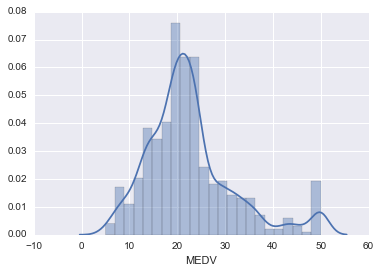

In [18]:
sns.distplot(df.MEDV)

In [20]:
df.count()

const      506
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

- 아웃라이어 왜 생겼을까? 위에 보면 나와 있어. 왜곡된 데이터들이 있어서
* 이러한 데이터가 있는 이유는 여러 가지 경우가 있다. 그러면 어떻게 하느냐? 버리면 된다.
* 버린 데이터를 df2 데이터로 만들어라.

In [26]:
df2 = df.drop(df[df.MEDV >= df.MEDV.max()].index)
df2.count()

const      490
CRIM       490
ZN         490
INDUS      490
CHAS       490
NOX        490
RM         490
AGE        490
DIS        490
RAD        490
TAX        490
PTRATIO    490
B          490
LSTAT      490
MEDV       490
dtype: int64

In [28]:
model2 = sm.OLS(df2.ix[:, -1], df2.ix[:, :-1])
result2 = model2.fit()
print(result2.summary())
# 보스턴 집값에서 스케일링과 아웃라이어 제거했더니 0.778로 올라가고 JB도 줄었다.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     128.0
Date:                Thu, 08 Sep 2016   Prob (F-statistic):          4.79e-146
Time:                        11:36:15   Log-Likelihood:                -1337.1
No. Observations:                 490   AIC:                             2702.
Df Residuals:                     476   BIC:                             2761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         32.2611      4.125      7.821      0.0

In [30]:
model_anova = sm.OLS.from_formula("MEDV ~ CHAS", data=df2)
result_anova = model_anova.fit()
table_anova = sm.stats.anova_lm(result_anova)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
CHAS,1.0,169.271183,169.271183,2.745998,0.098141
Residual,488.0,30081.716653,61.642862,NaN,NaN


In [41]:
model1 = LinearRegression()
model1.fit(df.ix[:, :-1], df.ix[:, -1])
model1.intercept_, model1.coef_

(36.491103280361394,
 array([ 0.        , -0.92041113,  1.08098058,  0.14296712,  0.68220346,
        -2.06009246,  2.67064141,  0.02112063, -3.10444805,  2.65878654,
        -2.07589814, -2.06215593,  0.85664044, -3.74867982]))

In [32]:
model2 = LinearRegression()
model2.fit(df2.ix[:, :-1], df2.ix[:, -1])
model2.intercept_, model2.coef_

(32.261106875317729,
 array([ 0.        , -0.90670198,  0.8218828 , -0.29825317,  0.11555586,
        -1.43856592,  2.63509594, -0.66398505, -2.54724295,  2.18110049,
        -2.31851126, -1.81435162,  0.72377893, -2.5036931 ]))

In [33]:
from sklearn.cross_validation import cross_val_score

In [42]:
score = cross_val_score(model1, df.ix[:, :-1], df.ix[:, -1], cv=5)
score, score.mean(), score.std()

(array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455]),
 0.35074135093252679,
 0.37970947498267887)

In [39]:
score2 = cross_val_score(model2, df2.ix[:, :-1], df2.ix[:, -1], cv=5)
score2, score2.mean(), score2.std()

(array([ 0.670774  ,  0.77345121,  0.5308856 ,  0.00644914,  0.11065571]),
 0.41844313129206795,
 0.305554268932822)

- LSTAT은 이상하다.
- log를 취하면 고차항이 항이 없어지게 된다.
- CRIM도 마찬가지 형태로 되어 있어서 로그를 취하면 나아지게 된다.
- DIS도 마찬가지

In [45]:
#Log transform
df3 = df2.drop(["CRIM", "DIS", "LSTAT", "MEDV"], axis=1)
df3["LOGCRIM"] = np.log(df2.CRIM)
df3["LOGDIS"] = np.log(df2.DIS)
df3["LOGLSTAT"] = np.log(df2.LSTAT)
df3["MEDV"] = df2.MEDV

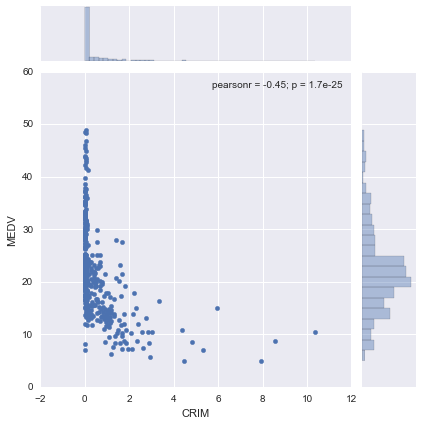

In [46]:
sns.jointplot("CRIM", "MEDV", data=df2)

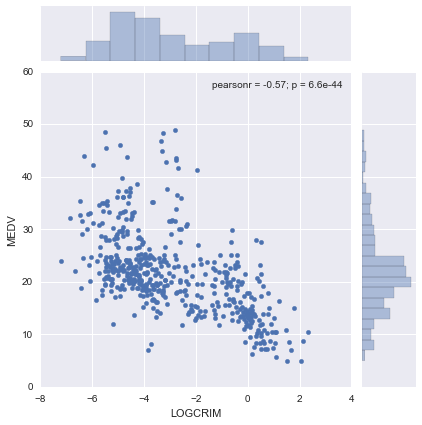

In [47]:
sns.jointplot("LOGCRIM", "MEDV", data=df3)

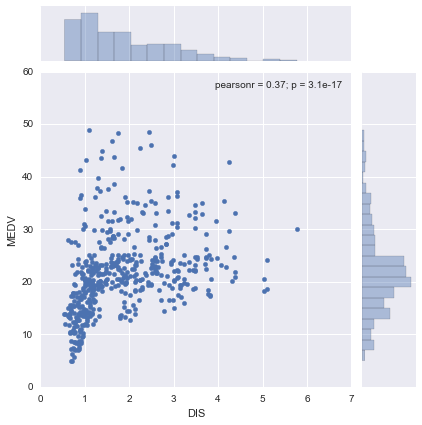

In [48]:
sns.jointplot("DIS", "MEDV", data=df2)

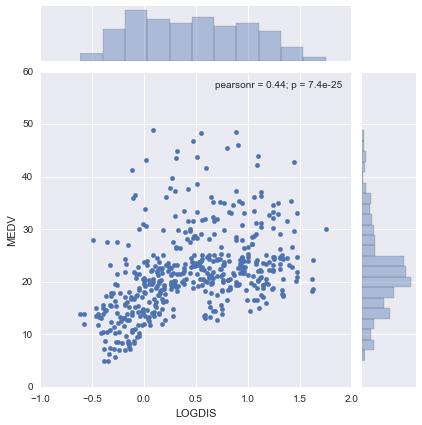

In [49]:
sns.jointplot("LOGDIS", "MEDV", data=df3)

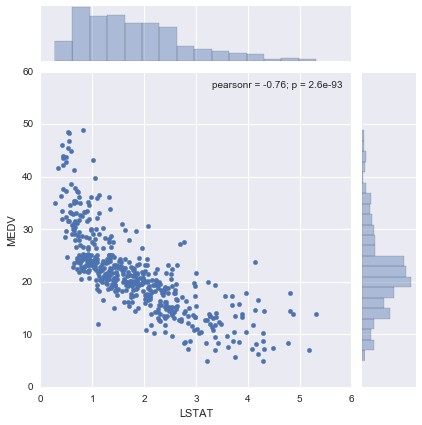

In [50]:
sns.jointplot("LSTAT", "MEDV", data=df2)

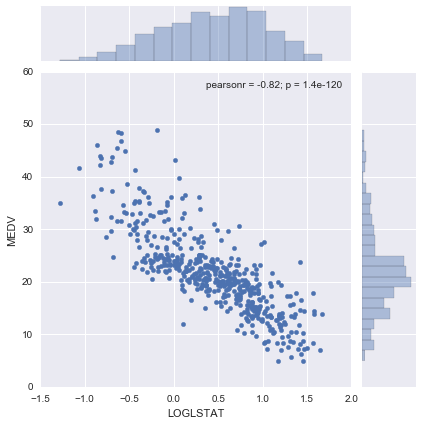

In [51]:
sns.jointplot("LOGLSTAT", "MEDV", data=df3)

In [52]:
model3 = sm.OLS(df3.ix[:, -1], df3.ix[:, :-1])
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 08 Sep 2016   Prob (F-statistic):          1.91e-155
Time:                        11:51:43   Log-Likelihood:                -1314.7
No. Observations:                 490   AIC:                             2657.
Df Residuals:                     476   BIC:                             2716.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         30.5248      3.930      7.767      0.0

In [53]:
score3 = cross_val_score(LinearRegression(), df3.ix[:, :-1], df3.ix[:, -1], cv=5)
score3, score3.mean(), score3.std()

(array([ 0.68959667,  0.78222319,  0.58690158,  0.13525116,  0.24691975]),
 0.48817847061802588,
 0.25280082986766356)

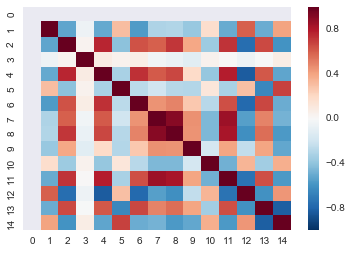

In [54]:
#Multicolinearity
sns.heatmap(np.corrcoef(df3.T))

- 다중공선성이 있다. Multicolinearity

In [56]:
df4 = df3.drop(["ZN", "INDUS", "AGE", "LOGCRIM", "RAD", "TAX"], axis=1)

In [57]:
model4 = sm.OLS(df4.ix[:, -1], df4.ix[:, :-1])
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     251.8
Date:                Thu, 08 Sep 2016   Prob (F-statistic):          1.43e-156
Time:                        11:54:42   Log-Likelihood:                -1328.5
No. Observations:                 490   AIC:                             2673.
Df Residuals:                     482   BIC:                             2706.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         28.6735      3.623      7.915      0.0

- result4 기존보다  Adj. R-squared가 더 좋아졌다. 4개의 변수가 빠졌음에도 좋아졌다는 것은 의미가 있음

In [58]:
model4 = LinearRegression()
model4.fit(df4.ix[:, :-1], df4.ix[:, -1])
model4.intercept_, model4.coef_

(28.673501436085324,
 array([ 0.        ,  0.34006785, -1.8904632 ,  2.18684776, -1.84523604,
         0.78726593, -3.600516  , -7.16660871]))

In [59]:
score4 = cross_val_score(LinearRegression(), df4.ix[:, :-1], df4.ix[:, -1], cv=5)
score4, score4.mean(), score4.std()

(array([ 0.7160077 ,  0.7598543 ,  0.56232156,  0.23754958,  0.39348215]),
 0.53384305959027123,
 0.19624834931434582)

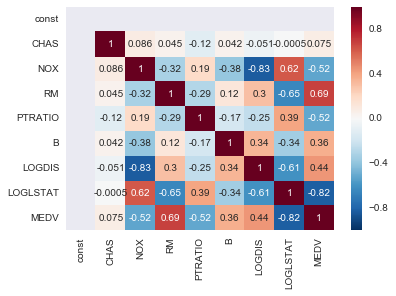

In [60]:
sns.heatmap(np.corrcoef(df4.T), xticklabels=df4.columns, yticklabels=df4.columns, annot=True)